<img src='Chess.jpg' style = 'width:700px; height:400px'/>

  ### Meaning of the Acronym Word in Chess  Project
  
- FIDE-Average International Chess Federation 
- GMs-International Grandmaster
- IMs-Life Master"
- FMs-FMs failed / aspiring to become IM 
- WGMs-Woman Grandmaster
- WIMs Woman International Master
- WFMs-Woman FIDE Master (WFM)
- CM-Candidate Master
- WCM-woman candidate master


### Importing  the necessary libraries

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline  


### Impporting the Data set into Jupyter

In [2]:
CG=pd.read_csv('International_Chess_Stats.csv',index_col=False)

### Checking the head of the Data set

In [3]:
CG.head(7)

,Unnamed: 0,#,Country,Flag,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
0,0,1,Russia,NaN,34497,5734,16.62,1666,236,522,1177,50,101,409,34
1,1,2,India,NaN,32735,3581,10.94,1275,64,114,83,9,41,42,27
2,2,3,Germany,NaN,26577,1751,6.59,1841,94,273,861,18,40,69,49
3,3,4,Spain,NaN,25009,1430,5.72,1429,55,134,365,2,14,37,42
4,4,5,France,NaN,23784,2143,9.01,1580,50,117,234,4,18,21,41
5,5,6,Poland,NaN,10596,1537,14.51,1622,45,105,172,9,30,39,37
6,6,7,Italy,NaN,10256,604,5.89,1621,16,45,161,0,1,13,44


### Checking for Missing Value 

In [4]:
CG.isna().any()

Unnamed: 0      False
#               False
Country          True
Flag             True
Num Players     False
Women           False
% of Women      False
FIDE Average    False
GMs             False
IMs             False
FMs             False
WGMs            False
WIMs            False
WFMs            False
Age Avg         False
dtype: bool

In [5]:
CG.isna().sum()

Unnamed: 0        0
#                 0
Country           2
Flag            190
Num Players       0
Women             0
% of Women        0
FIDE Average      0
GMs               0
IMs               0
FMs               0
WGMs              0
WIMs              0
WFMs              0
Age Avg           0
dtype: int64

### Droping  the missing value 

In [6]:
CG = CG.loc[:, ~CG.columns.str.contains('^Unnamed')]
CG = CG.drop ('Flag', axis=1)

In [7]:
CG = CG.drop("#", axis='columns')

### Checking the head after droping the miss vlave 

In [8]:
CG.head()

,Country,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
0,Russia,34497,5734,16.62,1666,236,522,1177,50,101,409,34
1,India,32735,3581,10.94,1275,64,114,83,9,41,42,27
2,Germany,26577,1751,6.59,1841,94,273,861,18,40,69,49
3,Spain,25009,1430,5.72,1429,55,134,365,2,14,37,42
4,France,23784,2143,9.01,1580,50,117,234,4,18,21,41


### Checking if there is still more missing values 

In [9]:
CG= CG.dropna()

In [10]:
CG.isna().any()

Country         False
Num Players     False
Women           False
% of Women      False
FIDE Average    False
GMs             False
IMs             False
FMs             False
WGMs            False
WIMs            False
WFMs            False
Age Avg         False
dtype: bool

### Checking the data structure of the data set 

In [11]:
CG.dtypes

Country          object
Num Players       int64
Women             int64
% of Women      float64
FIDE Average      int64
GMs               int64
IMs               int64
FMs               int64
WGMs              int64
WIMs              int64
WFMs              int64
Age Avg           int64
dtype: object

### General statistics of the data set

In [12]:
CG.describe()

,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,1851.632979,197.750000,11.820638,1634.659574,9.074468,20.462766,42.750000,1.654255,4.351064,9.106383,36.739362
std,4870.425325,561.516593,8.239526,166.601067,23.446031,51.465514,118.988546,4.853207,10.010911,31.322872,8.267658
min,2.000000,0.000000,0.000000,1141.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,47.750000,6.000000,5.935000,1544.500000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,31.000000
50%,298.500000,33.500000,10.785000,1651.000000,0.000000,3.000000,8.500000,0.000000,0.500000,3.000000,36.000000
75%,1228.750000,181.500000,17.402500,1742.000000,8.250000,22.000000,30.250000,1.000000,4.000000,9.000000,41.250000
max,34497.000000,5734.000000,37.500000,2250.000000,236.000000,522.000000,1177.000000,50.000000,101.000000,409.000000,63.000000


### EDA (Exploratory Data Analysis)

### Checking the Country again the number of each Country  Players 

## Data Head After Cleaning 

In [13]:
CG.head()

,Country,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
0,Russia,34497,5734,16.62,1666,236,522,1177,50,101,409,34
1,India,32735,3581,10.94,1275,64,114,83,9,41,42,27
2,Germany,26577,1751,6.59,1841,94,273,861,18,40,69,49
3,Spain,25009,1430,5.72,1429,55,134,365,2,14,37,42
4,France,23784,2143,9.01,1580,50,117,234,4,18,21,41


#### Country havuing the  most player 

In [14]:
# count of the player by country 
country_counts = CG['Country']. value_counts()

# Display top countries with the most players
print (country_counts.head())

Netherlands Antilles    2
Brunei                  2
Russia                  1
Palau                   1
Oman                    1
Name: Country, dtype: int64


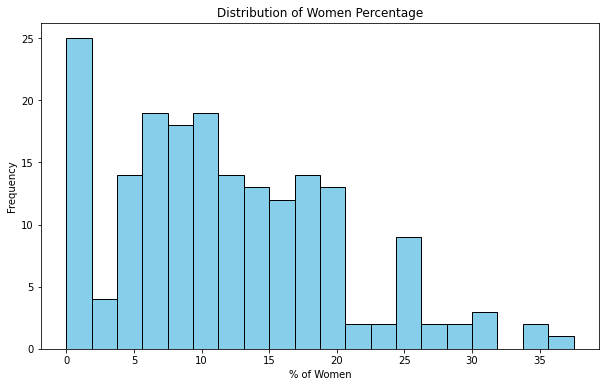

In [15]:
# plotting the distribution of women percentage
plt.figure(figsize=(10,6))
plt.hist(CG['% of Women'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Women Percentage')
plt.xlabel('% of Women')
plt.ylabel('Frequency')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

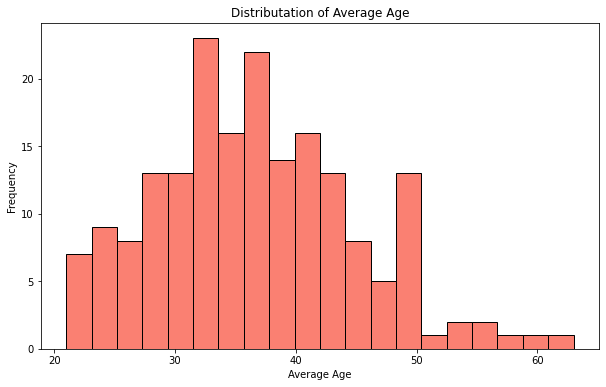

In [16]:
# Plotting the distribution of avarage age 
plt. figure(figsize=(10,6))
plt.hist(CG['Age Avg'], bins=20, color='salmon', edgecolor='black')
plt.title('Distributation of Average Age')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.show


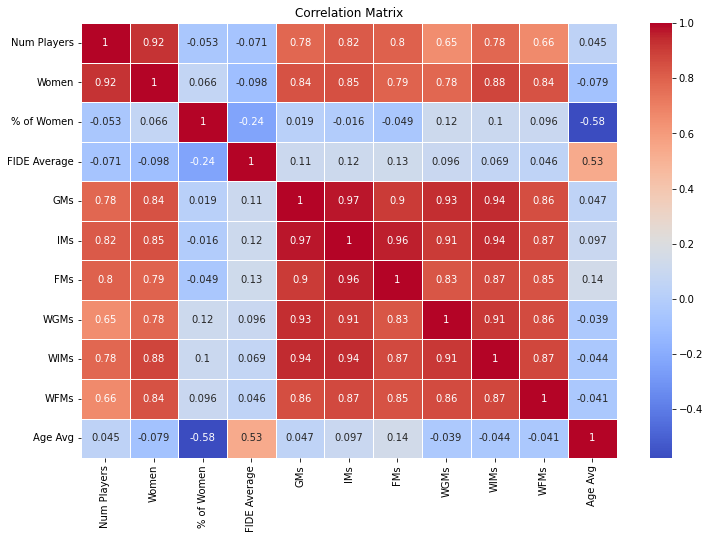

In [17]:
# Correlation matrix

correlation_matrix = CG.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Top countries by average FIDE rating
top_countries_by_rating =CG.groupby ('Country')['FIDE Average']. mean().sort_values(ascending=False)

# Display top countries
print(top_countries_by_rating.head())







Country
Cambodia       2250.0
South Sudan    1961.0
Kosovo         1923.0
Nigeria        1899.0
Myanmar        1891.0
Name: FIDE Average, dtype: float64


In [19]:
# Top countries by number of Grandmasters (GMs)
top_countries_by_gms = CG.groupby('Country')['GMs'].sum().sort_values(ascending=False)

# Display top countries
print(top_countries_by_gms.head())


Country
Russia           236
United States     95
Germany           94
Ukraine           89
India             64
Name: GMs, dtype: int64


In [20]:
# Number of player by country
players_by_country =CG.groupby('Country') ['Num Players'].sum().sort_values(ascending =False)

# display top countries with the most players 
print(players_by_country.head())


Country
Russia     34497
India      32735
Germany    26577
Spain      25009
France     23784
Name: Num Players, dtype: int64


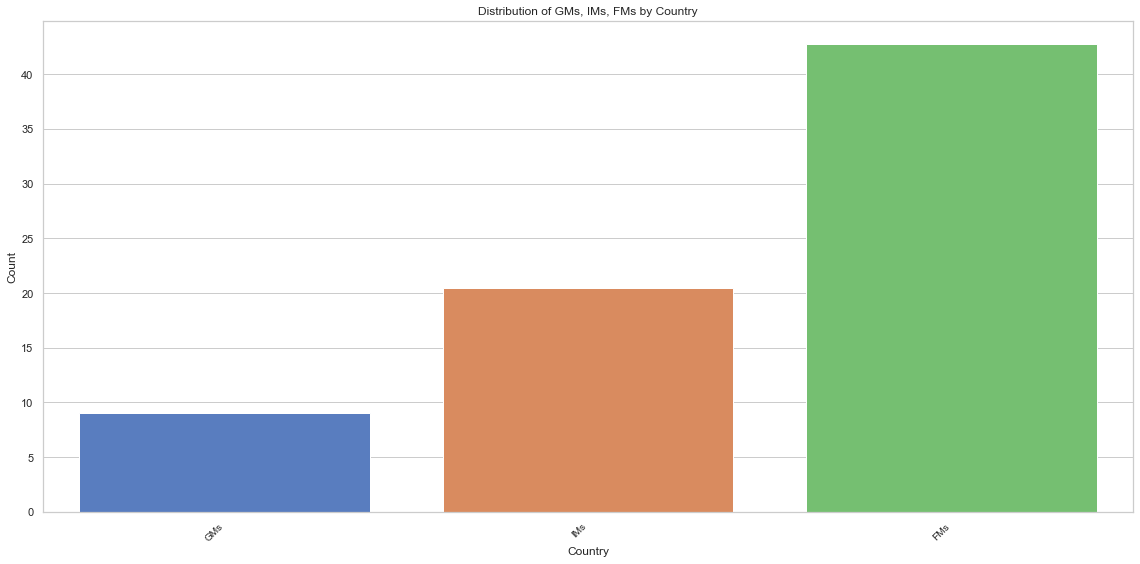

In [21]:

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting the distribution of GMs, IMs, FMs
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=CG[['GMs', 'IMs', 'FMs']], palette="muted", ci=None)

# Customize the plot
ax.set_title('Distribution of GMs, IMs, FMs by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()



### Machine Learning 
Would be Predicting the average FIDE rating this will be base on the bassed on the certain features from the table. 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features (X) and target variable (y)
X = CG[['Num Players', 'Women', '% of Women', 'GMs', 'IMs', 'FMs', 'WGMs', 'WIMs', 'WFMs', 'Age Avg']]
y = CG['FIDE Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 26067.279912831626


In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 26067.279912831626
R-squared: 0.12962237949543576
Mean Absolute Error: 117.53287571205537


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Features (X) and target variable (y)
X = CG[['Num Players', 'Women', '% of Women', 'GMs', 'IMs', 'FMs', 'WGMs', 'WIMs', 'WFMs', 'Age Avg']]
y = CG['FIDE Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
rf_predictions = best_rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')
print(f'Random Forest Mean Absolute Error: {rf_mae}')


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Mean Squared Error: 29633.760335212628
Random Forest R-squared: 0.0105388098253969
Random Forest Mean Absolute Error: 126.54422822207023


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Features (X) and target variable (y)
X = CG[['Num Players', 'Women', '% of Women', 'GMs', 'IMs', 'FMs', 'WGMs', 'WIMs', 'WFMs', 'Age Avg']]
y = CG['FIDE Average']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
rf_predictions = best_rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')
print(f'Random Forest Mean Absolute Error: {rf_mae}')


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Mean Squared Error: 29292.202487532235
Random Forest R-squared: 0.021943310322680598
Random Forest Mean Absolute Error: 124.57159016385661
